<a href="https://colab.research.google.com/github/cckmwong-data/customer_segmentation/blob/main/Customer_Segmentation_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CUSTOMER SEGMENTATION USING K-PROTOTYPE ALGORITHM**

## **Problem Statement**
In today’s competitive market landscape, understanding customers is essential for businesses to provide personalized experience and optimize marketing strategies. Yet, many companies are still struggling to identify their customers, resulting in inefficient resource allocation and missing business opportunities for their targeted customers.

The aim of this project is to help an insurance company to categorize customers into distinct groups based on shared characteristics such as purchasing behavior and demographics. By applying machine learning and clustering algorithm (K-Prototypes), the program uncovers hidden patterns in the customer data, enabling the insurer to tailor its marketing strategies, enhance customer satisfaction, and ultimately drive profitability.

## **Clustering Algorithm of Customer Segmentation**


1. Import all the required libraries and datasets, alongside data cleaning
2. Data wrangling and feature engineering to ensure the data is in the right format for K-Prototype clustering
3.   Find the best number of clustering by identifying the lowest WCSS (within cluster sum of squares) and the highest Silhouette Score
4.   Visualize the clustering results in 2-D graphics using Factor Analysis of Mixed Data (FAMD), a dimensionality reduction technique for dealing with datasets containing both categorical and numerical variables.
5.   Assign clustering label for each customer
6.   Load the updated customers, sales and products tables to Google BigQuery


##**ETL Pipeline of the Whole Project**

---
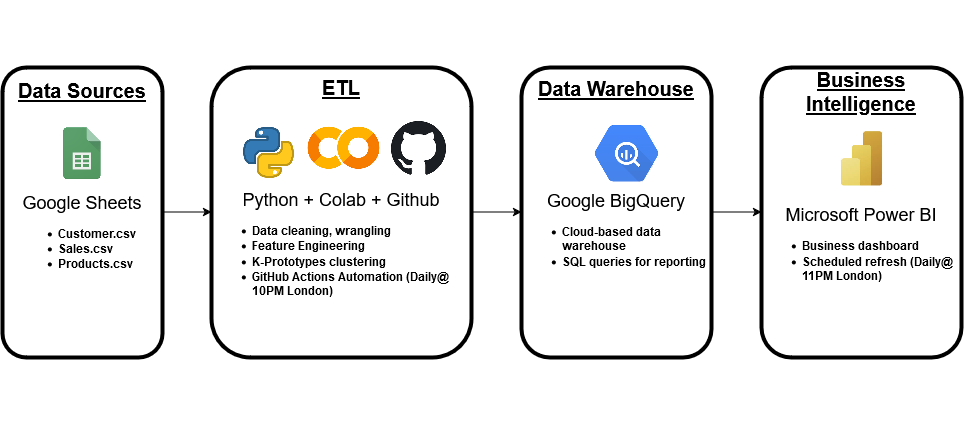

# (1) Import Libraries

In [1]:
!pip install kmodes # install kmodes for KPrototypes algorithm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, OneHotEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# (2) Import Dataset

In [3]:
# Extract the customer data from a csv file in Google Sheet
df_customers = pd.read_csv('https://docs.google.com/spreadsheets/d/1-NdLEzPBOxY7NfzDngoS4id9ekZ-eqIF7ZnX6JXdweg/gviz/tq?tqx=out:csv&gid=0')
df_customers

Customer_ID  Age  Gender                City Marital_Status  \
0        HL00001   42  Female              London        Widowed   
1        HL00002   42    Male          Manchester       Divorced   
2        HL00003   28    Male           Liverpool       Divorced   
3        HL00004   43    Male              London       Divorced   
4        HL00005   41  Female          Manchester        Widowed   
...          ...  ...     ...                 ...            ...   
3441     HL03442   42    Male             Bristol         Single   
3442     HL03443   18    Male               Leeds       Divorced   
3443     HL03444   34  Female              London       Divorced   
3444     HL03445   54  Female             Belfast        Married   
3445     HL03446   25  Female  Kingston upon Hull        Widowed   

              Education    Occupation        Income Preferred_Language  \
0             Doctorate        Lawyer   3606.244329            English   
1     Bachelor's Degree       Teacher   7540.264366            English   
2             Doctorate        Lawyer   8399.983948            English   
3     Bachelor's Degree      Engineer   7414.070392            English   
4             Doctorate        Lawyer   3944.267241            English   
...                 ...           ...           ...                ...   
3441    Master's Degree       Manager   4069.362627            English   
3442   Associate Degree        Doctor  10623.167430            English   
3443          Doctorate  Entrepreneur   8106.176722            Chinese   
3444  Bachelor's Degree       Manager   5529.070372            English   
3445  Bachelor's Degree       Manager   5077.185324            English   

      Preferred_Channel Preferred_Time  
0     In-Person Meeting        Morning  
1                  Mail        Morning  
2                 Phone      Afternoon  
3     In-Person Meeting        Evening  
4                 Email        Evening  
...                 ...            ...  
3441  In-Person Meeting        Anytime  
3442              Phone       Weekends  
3443              Phone        Evening  
3444              Email       Weekends  
3445               Mail        Morning  

[3446 rows x 11 columns]

In [4]:
# Extract the sales data from a csv file in Google Sheet
df_sales = pd.read_csv('https://docs.google.com/spreadsheets/d/1j3R2rUUAlUZO-2-x2OlMeMV23wgXZy7LfatlnCLsDJk/gviz/tq?tqx=out:csv&gid=0')
df_sales

Policy_ID Customer_ID Purchase_Date  Premium  Coverage
0     POL200000     HL00001     10/1/2014   62.888    8160.1
1     POL200002     HL00002     2/20/2024   50.007   26134.6
2     POL200006     HL00003     4/23/2022  186.603   47964.3
3     POL200010     HL00004     12/6/2022   27.081   19515.2
4     POL200007     HL00005      1/2/2015  279.766   41097.1
...         ...         ...           ...      ...       ...
3441  POL200009     HL03442     3/20/2021  125.373   39276.2
3442  POL200008     HL03443      5/8/2021   23.869    7696.2
3443  POL200008     HL03444      2/8/2021   14.687    7047.8
3444  POL200011     HL03445     9/23/2011   62.551    7981.3
3445  POL200009     HL03446     2/15/2019  166.167   20467.2

[3446 rows x 5 columns]

In [5]:
# Extract the products data from a csv file in Google Sheet
df_products = pd.read_csv('https://docs.google.com/spreadsheets/d/1HpCKgERS0F9qjHh3y0_GZ988JjX4vtKBX5rIksCgB5I/gviz/tq?tqx=out:csv&gid=0')
df_products

Policy_ID           Product_Name Product_Type    Category
0   POL200000        WellBeing Cover       Health       Group
1   POL200001             MediAssist       Health       Group
2   POL200002        FamilyLife Plus         Life       Group
3   POL200003             LifeShield         Life       Group
4   POL200004           SecureLegacy         Life       Group
5   POL200005              DriveSure         Auto       Group
6   POL200006            TradeSecure     Property    Business
7   POL200007            AssetShield     Property    Business
8   POL200008          OfficeProtect     Property    Business
9   POL200009            MotorShield         Auto    Business
10  POL200010            TruePromise         Life  Individual
11  POL200011           HealthBridge       Health  Individual
12  POL200012            PrimeHealth       Health  Individual
13  POL200013         EverGuard Life         Life  Individual
14  POL200014        QuickCover Auto         Auto  Individual
15  POL200015       VitalCare Family       Health      Family
16  POL200016     TruePromise Family         Life      Family
17  POL200017      LifeShield Family         Life      Family
18  POL200018  SuperGold Life Family         Life      Family

# (3) Data Cleaning

In [6]:
# Check the columns and datatypes of customers data
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         3446 non-null   object 
 1   Age                 3446 non-null   int64  
 2   Gender              3446 non-null   object 
 3   City                3446 non-null   object 
 4   Marital_Status      3446 non-null   object 
 5   Education           3446 non-null   object 
 6   Occupation          3446 non-null   object 
 7   Income              3446 non-null   float64
 8   Preferred_Language  3446 non-null   object 
 9   Preferred_Channel   3446 non-null   object 
 10  Preferred_Time      3446 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 296.3+ KB


In [7]:
# Check the columns and datatypes of sales dats
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Policy_ID      3446 non-null   object 
 1   Customer_ID    3446 non-null   object 
 2   Purchase_Date  3446 non-null   object 
 3   Premium        3446 non-null   float64
 4   Coverage       3446 non-null   float64
dtypes: float64(2), object(3)
memory usage: 134.7+ KB


In [8]:
# Check the columns and datatypes of products dats
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Policy_ID     19 non-null     object
 1   Product_Name  19 non-null     object
 2   Product_Type  19 non-null     object
 3   Category      19 non-null     object
dtypes: object(4)
memory usage: 740.0+ bytes


In [9]:
# Check if any empty values for customers data
df_customers.isnull().sum()

Customer_ID           0
Age                   0
Gender                0
City                  0
Marital_Status        0
Education             0
Occupation            0
Income                0
Preferred_Language    0
Preferred_Channel     0
Preferred_Time        0
dtype: int64

In [10]:
# Check if any empty values for sales data
df_sales.isnull().sum()

Policy_ID        0
Customer_ID      0
Purchase_Date    0
Premium          0
Coverage         0
dtype: int64

In [11]:
# Check if any empty values for products data
df_products.isnull().sum()

Policy_ID       0
Product_Name    0
Product_Type    0
Category        0
dtype: int64

In [12]:
# Check if any duplicated rows
df_customers.duplicated().sum()

np.int64(0)

In [13]:
# Check if any duplicated rows
df_sales.duplicated().sum()

np.int64(0)

In [14]:
# Check if any duplicated rows
df_products.duplicated().sum()

np.int64(0)

# (4) Data Wraggling and Visualization

In [15]:
# Find the loyalty of the customers by calculating the number of years the customers purchased the policy

# Convert 'Purchase_History' to pandas datetime format
df_sales['Purchase_Date'] = pd.to_datetime(df_sales['Purchase_Date'], format='mixed')

# Get today's date as a pandas Timestamp
today = pd.Timestamp.today()

# Convert 'Purchase_History' to individual timestamps before subtracting
df_sales['Tenure_Years'] = (today - df_sales['Purchase_Date'].astype('datetime64[ns]')).dt.days / 365

df_sales['Tenure_Years'] = df_sales['Tenure_Years'].round(2)

In [16]:
# Calculate premium to coverage ratio which shows the profitability for insurance company
# Higher the ratio, higher the amount customers willing to pay their premiums
# relative to the amount of coverage they are receiving

df_sales['Premium_to_Coverage'] = df_sales['Premium']/ df_sales['Coverage']*100
df_sales

Policy_ID Customer_ID Purchase_Date  Premium  Coverage  Tenure_Years  \
0     POL200000     HL00001    2014-10-01   62.888    8160.1         10.57   
1     POL200002     HL00002    2024-02-20   50.007   26134.6          1.17   
2     POL200006     HL00003    2022-04-23  186.603   47964.3          3.00   
3     POL200010     HL00004    2022-12-06   27.081   19515.2          2.38   
4     POL200007     HL00005    2015-01-02  279.766   41097.1         10.31   
...         ...         ...           ...      ...       ...           ...   
3441  POL200009     HL03442    2021-03-20  125.373   39276.2          4.10   
3442  POL200008     HL03443    2021-05-08   23.869    7696.2          3.96   
3443  POL200008     HL03444    2021-02-08   14.687    7047.8          4.21   
3444  POL200011     HL03445    2011-09-23   62.551    7981.3         13.59   
3445  POL200009     HL03446    2019-02-15  166.167   20467.2          6.19   

      Premium_to_Coverage  
0                0.770677  
1                0.191344  
2                0.389046  
3                0.138769  
4                0.680744  
...                   ...  
3441             0.319209  
3442             0.310140  
3443             0.208391  
3444             0.783719  
3445             0.811870  

[3446 rows x 7 columns]

In [17]:
# merge the sales and customers data for clustering
df_merged = pd.merge(df_sales, df_customers, on='Customer_ID', how='left')
df_merged

Policy_ID Customer_ID Purchase_Date  Premium  Coverage  Tenure_Years  \
0     POL200000     HL00001    2014-10-01   62.888    8160.1         10.57   
1     POL200002     HL00002    2024-02-20   50.007   26134.6          1.17   
2     POL200006     HL00003    2022-04-23  186.603   47964.3          3.00   
3     POL200010     HL00004    2022-12-06   27.081   19515.2          2.38   
4     POL200007     HL00005    2015-01-02  279.766   41097.1         10.31   
...         ...         ...           ...      ...       ...           ...   
3441  POL200009     HL03442    2021-03-20  125.373   39276.2          4.10   
3442  POL200008     HL03443    2021-05-08   23.869    7696.2          3.96   
3443  POL200008     HL03444    2021-02-08   14.687    7047.8          4.21   
3444  POL200011     HL03445    2011-09-23   62.551    7981.3         13.59   
3445  POL200009     HL03446    2019-02-15  166.167   20467.2          6.19   

      Premium_to_Coverage  Age  Gender                City Marital_Status  \
0                0.770677   42  Female              London        Widowed   
1                0.191344   42    Male          Manchester       Divorced   
2                0.389046   28    Male           Liverpool       Divorced   
3                0.138769   43    Male              London       Divorced   
4                0.680744   41  Female          Manchester        Widowed   
...                   ...  ...     ...                 ...            ...   
3441             0.319209   42    Male             Bristol         Single   
3442             0.310140   18    Male               Leeds       Divorced   
3443             0.208391   34  Female              London       Divorced   
3444             0.783719   54  Female             Belfast        Married   
3445             0.811870   25  Female  Kingston upon Hull        Widowed   

              Education    Occupation        Income Preferred_Language  \
0             Doctorate        Lawyer   3606.244329            English   
1     Bachelor's Degree       Teacher   7540.264366            English   
2             Doctorate        Lawyer   8399.983948            English   
3     Bachelor's Degree      Engineer   7414.070392            English   
4             Doctorate        Lawyer   3944.267241            English   
...                 ...           ...           ...                ...   
3441    Master's Degree       Manager   4069.362627            English   
3442   Associate Degree        Doctor  10623.167430            English   
3443          Doctorate  Entrepreneur   8106.176722            Chinese   
3444  Bachelor's Degree       Manager   5529.070372            English   
3445  Bachelor's Degree       Manager   5077.185324            English   

      Preferred_Channel Preferred_Time  
0     In-Person Meeting        Morning  
1                  Mail        Morning  
2                 Phone      Afternoon  
3     In-Person Meeting        Evening  
4                 Email        Evening  
...                 ...            ...  
3441  In-Person Meeting        Anytime  
3442              Phone       Weekends  
3443              Phone        Evening  
3444              Email       Weekends  
3445               Mail        Morning  

[3446 rows x 17 columns]

In [18]:
# Extract the columns that are useful for the analysis
df = df_merged[['Age', 'Marital_Status','Income','Tenure_Years', 'Premium_to_Coverage']].copy()

In [19]:
df

Age Marital_Status        Income  Tenure_Years  Premium_to_Coverage
0      42        Widowed   3606.244329         10.57             0.770677
1      42       Divorced   7540.264366          1.17             0.191344
2      28       Divorced   8399.983948          3.00             0.389046
3      43       Divorced   7414.070392          2.38             0.138769
4      41        Widowed   3944.267241         10.31             0.680744
...   ...            ...           ...           ...                  ...
3441   42         Single   4069.362627          4.10             0.319209
3442   18       Divorced  10623.167430          3.96             0.310140
3443   34       Divorced   8106.176722          4.21             0.208391
3444   54        Married   5529.070372         13.59             0.783719
3445   25        Widowed   5077.185324          6.19             0.811870

[3446 rows x 5 columns]

In [20]:
# Identify the columns with categorical and numeric labels
categorical_cols = ['Marital_Status']
numerical_cols = ['Age', 'Income', 'Tenure_Years', 'Premium_to_Coverage']

In [21]:
# Define categorical column indices
categorical_indices = [df.columns.get_loc(col) for col in categorical_cols]
categorical_indices

[1]

In [22]:
# Define categorical column indices
numeric_indices = [df.columns.get_loc(col) for col in numerical_cols]
numeric_indices

[0, 2, 3, 4]

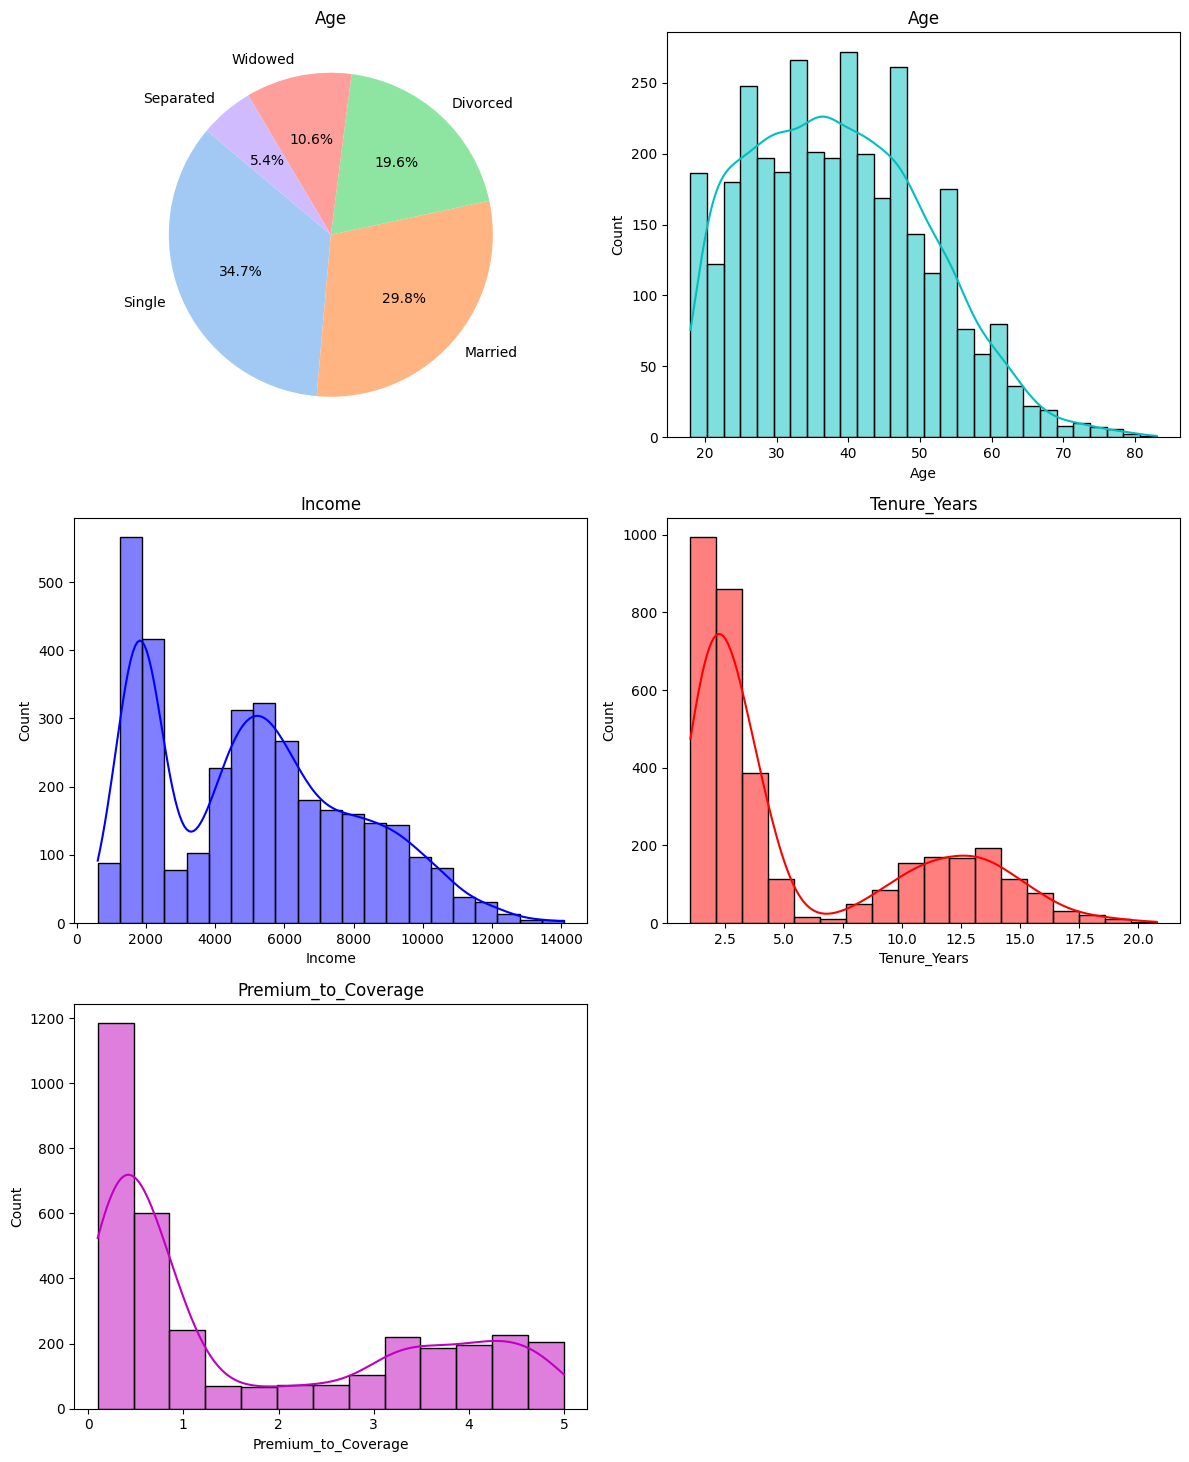

In [93]:
# Shows the distribution of each feature

plt.figure(figsize=(12, 24))
colours_val = ['c', 'b', 'r', 'm']

length = len(categorical_indices) + len(numerical_cols)

# Pie Charts for Categorical Features
for j, i in enumerate(categorical_indices):
    plt.subplot(length, 2, j + 1)
    value_counts = df.iloc[:, i].value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette("pastel"), startangle=140)
    plt.title(df_customers.columns[i])

# Histograms for Numerical Features
for j, i in enumerate(numeric_indices):
    plt.subplot(length, 2, len(categorical_indices) + j + 1)
    sns.histplot(df.iloc[:, i], kde=True, color=colours_val[j])
    plt.title(df.columns[i])

plt.tight_layout()
plt.show()

# (5) Feature Engineering

*   Categorical labels: can be used directly in K-Prototypes without any conversion
*   Numerical labels: Scale the numerical values to a range of 0 and 1 using **MinMaxScaler**



In [24]:
df_c = df.copy()

In [25]:
# ensure all columns with numerical values are in float data type
for col in numerical_cols:
    df_c[col] = df_c[col].astype('float64')

In [26]:
# Statistics of the dataset
df_c.describe()

Age        Income  Tenure_Years  Premium_to_Coverage
count  3446.000000   3446.000000   3446.000000          3446.000000
mean     38.705165   5070.176406      5.662615             1.752091
std      12.234530   2890.010230      4.912250             1.662168
min      18.000000    611.986585      1.060000             0.100021
25%      29.000000   2106.059587      2.010000             0.364445
50%      38.000000   4979.300814      3.070000             0.815578
75%      47.000000   7094.055944     10.387500             3.420249
max      83.000000  14078.126680     20.770000             4.998828

In [27]:
# scale the numerical variables
scaler = MinMaxScaler()
df_c[numerical_cols] = scaler.fit_transform(df_c[numerical_cols])
df_c

Age Marital_Status    Income  Tenure_Years  Premium_to_Coverage
0     0.369231        Widowed  0.222355      0.482496             0.136902
1     0.369231       Divorced  0.514496      0.005581             0.018642
2     0.153846       Divorced  0.578339      0.098427             0.058999
3     0.384615       Divorced  0.505125      0.066971             0.007910
4     0.353846        Widowed  0.247456      0.469305             0.118544
...        ...            ...       ...           ...                  ...
3441  0.369231         Single  0.256746      0.154236             0.044743
3442  0.000000       Divorced  0.743434      0.147133             0.042892
3443  0.246154       Divorced  0.556521      0.159817             0.022122
3444  0.553846        Married  0.365144      0.635718             0.139564
3445  0.107692        Widowed  0.331587      0.260274             0.145311

[3446 rows x 5 columns]

In [28]:
# convert the data to array for clustering in the next step
c_array = df.to_numpy()
c_array

array([[42, 'Widowed', 3606.244329, 10.57, 0.7706768299408094],
       [42, 'Divorced', 7540.264366, 1.17, 0.1913440419979644],
       [28, 'Divorced', 8399.983948, 3.0, 0.38904560266698357],
       ...,
       [34, 'Divorced', 8106.176722, 4.21, 0.20839127103493288],
       [54, 'Married', 5529.070372, 13.59, 0.7837194442008194],
       [25, 'Widowed', 5077.185324, 6.19, 0.8118697232645402]],
      dtype=object)

# (6) Clustering using K-Prototypes
Since there are mixed data (categorical and numerical features), we prefer K-Prototypes to K-means, as the latter only works for numerical data.

K-prototypes combines the use of minimizing Euclidean distance for numerical labels and comparing matching dissimilarity for categorical labels, to determine the cluster centroids.

In [29]:
# we set k as the number of clusters

costs = {} # a dictionary to store the WCSS (Within-Cluster Sum of Square) for each k
labels = {} # a dictionary to store the predicted cluster labels for each k

range_of_k = range(2,10) # we set k from 2 to 9
for k in range_of_k :
    print("Checking k =", k)
    untrained_model = KPrototypes(n_clusters=k, init='Cao', max_iter=20, verbose=1)
    trained_model = untrained_model.fit(c_array, categorical=categorical_indices)

    labels[k] = trained_model.labels_ # predicted labels
    costs[k]=trained_model.cost_ # WCSS

Checking k = 2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 113, ncost: 8831926275.028576
Run: 1, iteration: 2/20, moves: 83, ncost: 8782357802.12681
Run: 1, iteration: 3/20, moves: 62, ncost: 8759234468.418488
Run: 1, iteration: 4/20, moves: 27, ncost: 8754298532.56267
Run: 1, iteration: 5/20, moves: 12, ncost: 8753189342.620905
Run: 1, iteration: 6/20, moves: 8, ncost: 8752804870.547081
Run: 1, iteration: 7/20, moves: 2, ncost: 8752762262.584427
Run: 1, iteration: 8/20, moves: 1, ncost: 8752755361.687778
Run: 1, iteration: 9/20, moves: 0, ncost: 8752755361.687778
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 580, ncost: 9303343610.538544
Run: 2, iteration: 2/20, moves: 250, ncost: 8912109056.964304
Run: 2, iteration: 3/20, moves: 134, ncost: 8803505462.450607
Run: 2, iteration: 

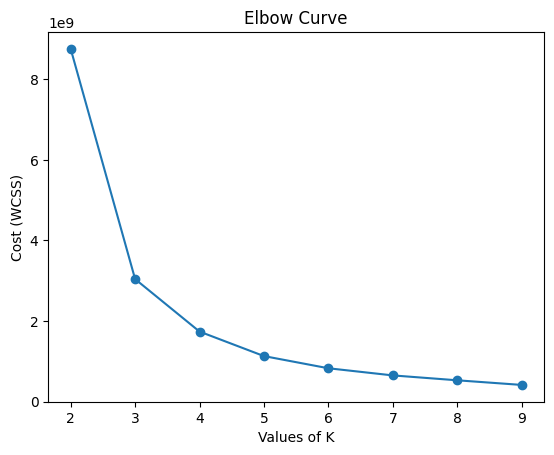

In [94]:
# We hope to minimize the cost (i.e. WCSS)
# Locate the optimal k (the no. of clusters) using Elbow Method, where the
# optimal k is the point that the rate of decrease in WCSS slows down or flattens
plt.plot(costs.keys(), costs.values())
plt.scatter(costs.keys(),costs.values())
plt.xlabel("Values of K")
plt.ylabel("Cost (WCSS)")
plt.title("Elbow Curve")
plt.show()

In [31]:
# We use gower distance to calculate Silhouette Score, due to the presence of categorical data
!pip install gower

from sklearn.metrics import silhouette_score
import gower

The best k:  3


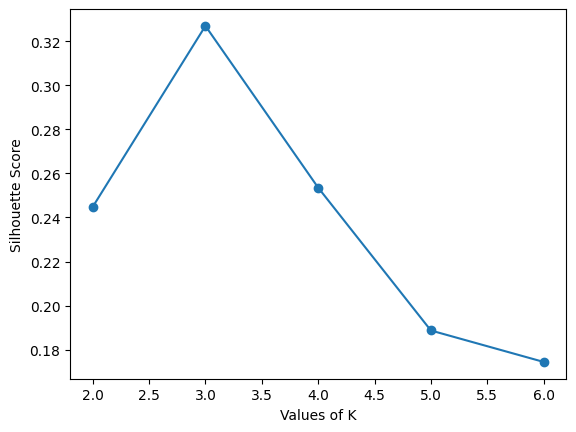

In [32]:
# Locating the best number of clusters by searching for the one with the highest Silhouette Score
# the best k is in-line with the results from the above Elbow Curve

scores = {}
best_k = 1
best_scores = 0

# Practically, we assume the number of clusters will not be more than 6
for k in range(2, 7) :
    #print("k = ", k)
    pred = labels[k]
    customers_final = df.copy()
    customers_final['Cluster'] = pred

    # Now compute the custom distance matrix on the sampled data
    gower_dist = gower.gower_matrix(customers_final.drop(columns=['Cluster']))
    cluster_labels = customers_final['Cluster']
    sil_score = silhouette_score(gower_dist, cluster_labels, metric='precomputed')
    scores[k] = sil_score
    if (best_scores < sil_score):
        best_k = k
        best_scores = sil_score
    #print('Silhouette Score: ', sil_score)

print("The best k: ", best_k)
plt.plot(scores.keys(), scores.values())
plt.scatter(scores.keys(),scores.values())
plt.xlabel("Values of K")
plt.ylabel("Silhouette Score")
plt.show()

In [33]:
# the optimal clustering prediction is the one with the highest score
pred = labels[best_k]
customers_clustered = df.copy()
customers_clustered['Cluster'] = pred

In [34]:
customers_clustered

Age Marital_Status        Income  Tenure_Years  Premium_to_Coverage  \
0      42        Widowed   3606.244329         10.57             0.770677   
1      42       Divorced   7540.264366          1.17             0.191344   
2      28       Divorced   8399.983948          3.00             0.389046   
3      43       Divorced   7414.070392          2.38             0.138769   
4      41        Widowed   3944.267241         10.31             0.680744   
...   ...            ...           ...           ...                  ...   
3441   42         Single   4069.362627          4.10             0.319209   
3442   18       Divorced  10623.167430          3.96             0.310140   
3443   34       Divorced   8106.176722          4.21             0.208391   
3444   54        Married   5529.070372         13.59             0.783719   
3445   25        Widowed   5077.185324          6.19             0.811870   

      Cluster  
0           0  
1           2  
2           2  
3           2  
4           1  
...       ...  
3441        1  
3442        2  
3443        2  
3444        1  
3445        1  

[3446 rows x 6 columns]

# (7) Evaluation of the Model


In [35]:
# we use FAMD for reducing the dimensions of mixed data
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 6.8 MB/s eta 0:00:00


In [36]:
df_c # dataframe with scaled numerical data and categorical labels (no clustering labels)

Age Marital_Status    Income  Tenure_Years  Premium_to_Coverage
0     0.369231        Widowed  0.222355      0.482496             0.136902
1     0.369231       Divorced  0.514496      0.005581             0.018642
2     0.153846       Divorced  0.578339      0.098427             0.058999
3     0.384615       Divorced  0.505125      0.066971             0.007910
4     0.353846        Widowed  0.247456      0.469305             0.118544
...        ...            ...       ...           ...                  ...
3441  0.369231         Single  0.256746      0.154236             0.044743
3442  0.000000       Divorced  0.743434      0.147133             0.042892
3443  0.246154       Divorced  0.556521      0.159817             0.022122
3444  0.553846        Married  0.365144      0.635718             0.139564
3445  0.107692        Widowed  0.331587      0.260274             0.145311

[3446 rows x 5 columns]

In [37]:
# reduced the dimensionality to 2-D for visualing the clustering
from prince import FAMD

famd = FAMD(n_components=2, random_state=42)
X_famd = famd.fit_transform(df_c)

X_famd #2-D

component         0         1
0          0.956560 -1.149766
1          0.745409  1.612068
2          0.347419  1.804352
3          0.891014  1.437480
4          0.969984 -1.018573
...             ...       ...
3441       0.120098  0.366916
3442       0.347907  2.320912
3443       0.730616  1.521796
3444       1.772701 -1.313658
3445       0.037018 -0.025143

[3446 rows x 2 columns]

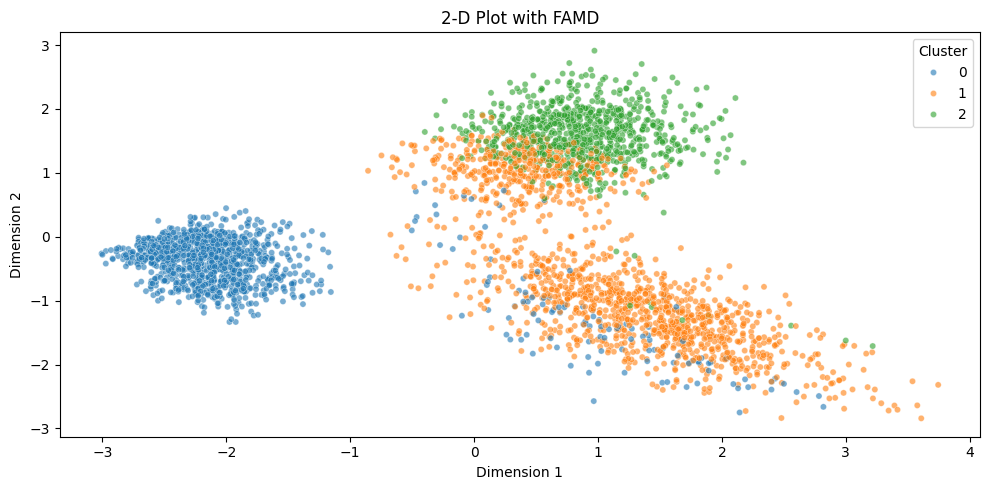

In [38]:
# Add cluster labels to the FAMD result for plotting
X_famd['Cluster'] = pred

# Scatter plot of the 2D data
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data = X_famd,
    x = X_famd.columns[0],
    y = X_famd.columns[1],
    hue ='Cluster',
    palette ='tab10',
    s = 20,
    alpha = 0.6,
)

plt.title("2-D Plot with FAMD")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()


# (8) Analysis of the Customer Segments

In [40]:
customers_clustered

Age Marital_Status        Income  Tenure_Years  Premium_to_Coverage  \
0      42        Widowed   3606.244329         10.57             0.770677   
1      42       Divorced   7540.264366          1.17             0.191344   
2      28       Divorced   8399.983948          3.00             0.389046   
3      43       Divorced   7414.070392          2.38             0.138769   
4      41        Widowed   3944.267241         10.31             0.680744   
...   ...            ...           ...           ...                  ...   
3441   42         Single   4069.362627          4.10             0.319209   
3442   18       Divorced  10623.167430          3.96             0.310140   
3443   34       Divorced   8106.176722          4.21             0.208391   
3444   54        Married   5529.070372         13.59             0.783719   
3445   25        Widowed   5077.185324          6.19             0.811870   

      Cluster  
0           0  
1           2  
2           2  
3           2  
4           1  
...       ...  
3441        1  
3442        2  
3443        2  
3444        1  
3445        1  

[3446 rows x 6 columns]

In [39]:
# Summarize the features for each cluster
customers_clustered.groupby('Cluster').agg({"Age":"median",
                                       "Marital_Status": lambda x: x.value_counts().index[0],
                                        "Income":"median",
                                        "Tenure_Years":"median",
                                        "Premium_to_Coverage":"median",
                                       })

Age Marital_Status       Income  Tenure_Years  Premium_to_Coverage
Cluster                                                                     
0        27.0         Single  1861.143190          2.21             3.908167
1        46.0        Married  5370.633317         10.85             0.703968
2        39.0         Single  8988.521074          2.91             0.294557

In [81]:
# Age is one of the most distinctive features for the clustering labels
# Automate the assignment of cluster labels ("Affluent Independents", "Established Protectors" and "Budget Starters")
# by comparing the age of each group
age = {}
clusters = {}
min_age = 999
max_age = 0

for i in range(0, best_k):
  age[i] = customers_clustered[customers_clustered['Cluster'] == i]['Age'].median()
  #print(age[i])
  if (age[i] < min_age):
    min_age = age[i]
    clusters[i] = "Budget Starters"
  elif (age[i] > max_age):
    max_age = age[i]
    clusters[i] = "Established Protectors"
  else:
    clusters[i] = "Affluent Independents"

for i in range(0, best_k):
  print(i, clusters[i])

0 Budget Starters
1 Established Protectors
2 Affluent Independents


In [82]:
# Assign the cluster labels for each row
for i in range(0, len(customers_clustered)):
  for j in range(0, best_k):
    if customers_clustered.loc[i, "Cluster"] == j:
        customers_clustered.loc[i, "Cluster_Label"] = clusters[j]

In [83]:
customers_clustered

Age Marital_Status        Income  Tenure_Years  Premium_to_Coverage  \
0      42        Widowed   3606.244329         10.57             0.770677   
1      42       Divorced   7540.264366          1.17             0.191344   
2      28       Divorced   8399.983948          3.00             0.389046   
3      43       Divorced   7414.070392          2.38             0.138769   
4      41        Widowed   3944.267241         10.31             0.680744   
...   ...            ...           ...           ...                  ...   
3441   42         Single   4069.362627          4.10             0.319209   
3442   18       Divorced  10623.167430          3.96             0.310140   
3443   34       Divorced   8106.176722          4.21             0.208391   
3444   54        Married   5529.070372         13.59             0.783719   
3445   25        Widowed   5077.185324          6.19             0.811870   

      Cluster           Cluster_Label  
0           0         Budget Starters  
1           2   Affluent Independents  
2           2   Affluent Independents  
3           2   Affluent Independents  
4           1  Established Protectors  
...       ...                     ...  
3441        1  Established Protectors  
3442        2   Affluent Independents  
3443        2   Affluent Independents  
3444        1  Established Protectors  
3445        1  Established Protectors  

[3446 rows x 7 columns]

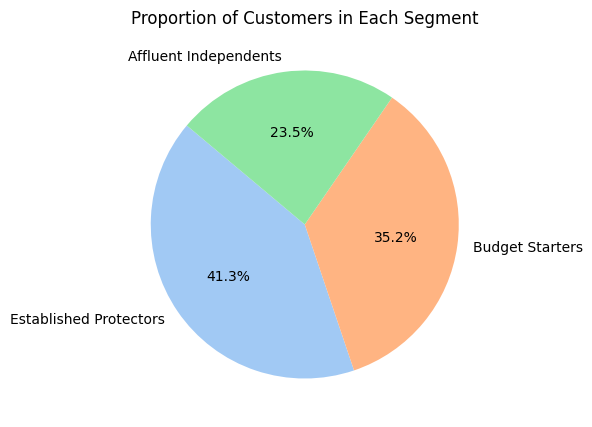

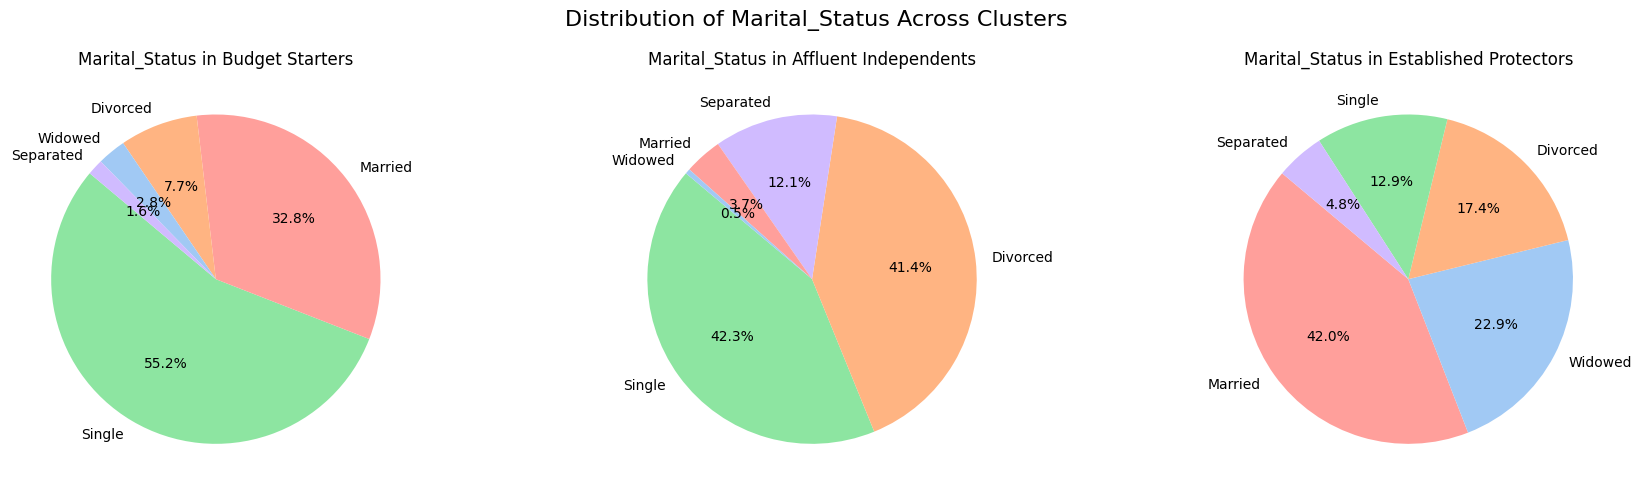

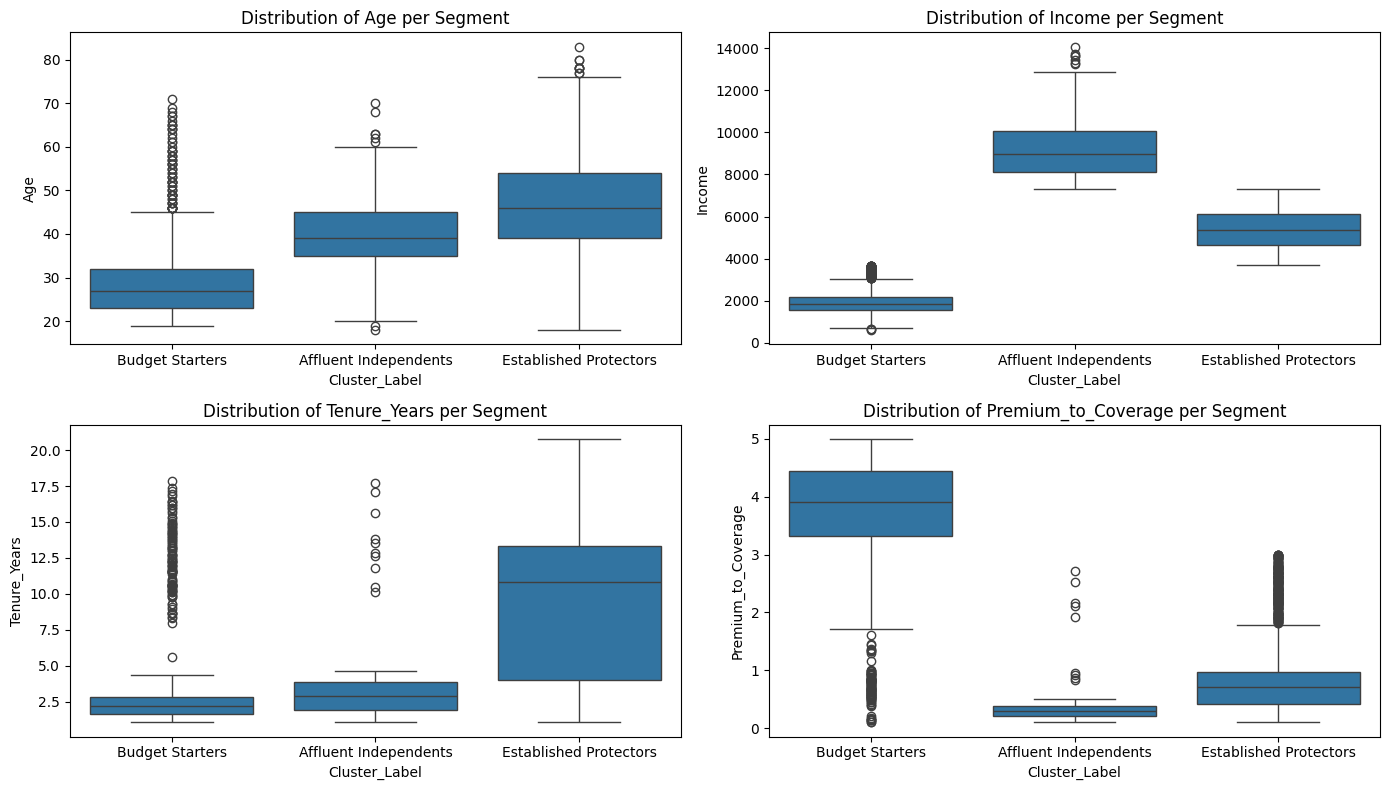

In [95]:
# Show the proportion of customer in each segment
plt.figure(figsize=(8, 5))
value_counts = customers_clustered.iloc[:, -1].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), startangle=140)
plt.title("Proportion of Customers in Each Segment")
plt.show()

# Analyze the distribution of categorical features in each segment
for feature in categorical_cols:
    df_i = customers_clustered[[feature, 'Cluster_Label']].groupby(['Cluster_Label'])

    # Create consistent color map per feature
    categories = customers_clustered[feature].unique()
    palette = sns.color_palette("pastel", len(categories))
    color_map = dict(zip(categories, palette))

    # Create a new figure of subplots for each feature
    plt.figure(figsize=(18, 5))
    j = 1 # counter for the position of each subplot

    # Make a subplot for the feature distribution for each cluster
    for cluster in customers_clustered.Cluster_Label.unique():
      # Count the number of every unique items of a feature by grouping cluster
        df_c = df_i.get_group((cluster,))[feature]
        value_counts = df_c.value_counts()
        # set the colours of the features
        colors = [color_map[val] for val in value_counts.index]

        plt.subplot(1, 3, j) # show 3 subplots in every row
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%',
                colors=colors, startangle=140)
        plt.title(f"{feature} in {cluster}")
        # move the counter by 1 for preparing making another subplot for the next cluster
        j = j + 1

    plt.suptitle(f"Distribution of {feature} Across Clusters", fontsize=16)
    plt.tight_layout()
    plt.show()


# Boxplot for numerical features
plt.figure(figsize=(14, 8))
j = 1 # counter for the position of subplot

for feature in numerical_cols:
    # Boxplot for numerical variable per cluster
    plt.subplot(2, 2, j)
    sns.boxplot(x = 'Cluster_Label', y = feature, data = customers_clustered)
    plt.title(f"Distribution of {feature} per Segment")
    j = j + 1

plt.tight_layout()
plt.show()

# (9) Load the Datasets to Google BigQuery

In [87]:
!pip install --upgrade pandas-gbq google-auth
from google.colab import auth
auth.authenticate_user()

In [88]:
df_clustered = pd.concat([df_merged, customers_clustered['Cluster']], axis=1) # concatenate the columns of cluster number to the original dataset
df_clustered = pd.concat([df_clustered, customers_clustered['Cluster_Label']], axis=1) # concatenate the columns of cluster labels to the original dataset

columns_to_add = ['Customer_ID', 'Cluster', 'Cluster_Label']
df_customers_clustered = pd.merge(df_customers, df_clustered[columns_to_add], on='Customer_ID', how='left') # copy the clustering no. and clustering labels to customer dataset
df_customers_clustered

Customer_ID  Age  Gender                City Marital_Status  \
0        HL00001   42  Female              London        Widowed   
1        HL00002   42    Male          Manchester       Divorced   
2        HL00003   28    Male           Liverpool       Divorced   
3        HL00004   43    Male              London       Divorced   
4        HL00005   41  Female          Manchester        Widowed   
...          ...  ...     ...                 ...            ...   
3441     HL03442   42    Male             Bristol         Single   
3442     HL03443   18    Male               Leeds       Divorced   
3443     HL03444   34  Female              London       Divorced   
3444     HL03445   54  Female             Belfast        Married   
3445     HL03446   25  Female  Kingston upon Hull        Widowed   

              Education    Occupation        Income Preferred_Language  \
0             Doctorate        Lawyer   3606.244329            English   
1     Bachelor's Degree       Teacher   7540.264366            English   
2             Doctorate        Lawyer   8399.983948            English   
3     Bachelor's Degree      Engineer   7414.070392            English   
4             Doctorate        Lawyer   3944.267241            English   
...                 ...           ...           ...                ...   
3441    Master's Degree       Manager   4069.362627            English   
3442   Associate Degree        Doctor  10623.167430            English   
3443          Doctorate  Entrepreneur   8106.176722            Chinese   
3444  Bachelor's Degree       Manager   5529.070372            English   
3445  Bachelor's Degree       Manager   5077.185324            English   

      Preferred_Channel Preferred_Time  Cluster           Cluster_Label  
0     In-Person Meeting        Morning        0         Budget Starters  
1                  Mail        Morning        2   Affluent Independents  
2                 Phone      Afternoon        2   Affluent Independents  
3     In-Person Meeting        Evening        2   Affluent Independents  
4                 Email        Evening        1  Established Protectors  
...                 ...            ...      ...                     ...  
3441  In-Person Meeting        Anytime        1  Established Protectors  
3442              Phone       Weekends        2   Affluent Independents  
3443              Phone        Evening        2   Affluent Independents  
3444              Email       Weekends        1  Established Protectors  
3445               Mail        Morning        1  Established Protectors  

[3446 rows x 13 columns]

In [92]:
from pandas_gbq import to_gbq

# Write the customer dataset to BigQuery
to_gbq(
    df_customers_clustered,
    destination_table='portfolio.customers',
    project_id='new-project-456705',
    if_exists='replace'
)

# Write the sales dataset to BigQuery
to_gbq(
    df_sales,
    destination_table='portfolio.sales',
    project_id='new-project-456705',
    if_exists='replace'
)

# Write the products dataset to BigQuery
to_gbq(
    df_products,
    destination_table='portfolio.products',
    project_id='new-project-456705',
    if_exists='replace'
)


100%|██████████| 1/1 [00:00<00:00, 9279.43it/s]
